In [22]:
!pip install anndata
!pip3 install scanpy
!pip3 install git+https://github.com/pachterlab/concordex.git

  Cloning https://github.com/pachterlab/concordex.git to /tmp/pip-req-build-0689f3qi
  Running command git clone --filter=blob:none --quiet https://github.com/pachterlab/concordex.git /tmp/pip-req-build-0689f3qi
  Resolved https://github.com/pachterlab/concordex.git to commit 7a7671caac98a25339cd257de2583d422529c003
  Preparing metadata (setup.py) ... done


In [23]:
# Import libraries
import numpy as np
import pandas as pd

import seaborn as sns
import scanpy as sc
import anndata

from concordex.concordex_map import concordex_map
from concordex.concordex_stat import concordex_stat

In [24]:
ad = sc.datasets.pbmc68k_reduced()

In [25]:
# Use cell type labels to compute concordex
assignments = ad.obs['louvain'].values

In [26]:
# Use PCA representation to compute concordex map matrix
pca = ad.obsm["X_pca"] # Can use spatial coordinates instead of PCs, if available
cdx_map = concordex_map(pca, assignments)

cdx_map

,0,1,2,3,4,5,6,7,8,9,10
0,0.913462,0.000385,0.001923,0.048077,0.004231,0.002308,0.000769,0.000000,0.000000,0.028462,0.000385
1,0.000000,0.880894,0.000407,0.000000,0.000000,0.110163,0.008537,0.000000,0.000000,0.000000,0.000000
2,0.003419,0.000000,0.920940,0.000000,0.000000,0.000855,0.060256,0.014530,0.000000,0.000000,0.000000
3,0.268571,0.000000,0.000714,0.684286,0.000000,0.025714,0.002143,0.000000,0.000000,0.018571,0.000000
4,0.035606,0.000000,0.000000,0.001515,0.946212,0.002273,0.002273,0.000000,0.008333,0.003788,0.000000
5,0.024074,0.223148,0.000926,0.004630,0.001852,0.695370,0.050000,0.000000,0.000000,0.000000,0.000000
6,0.001190,0.002381,0.370238,0.000000,0.000000,0.010714,0.613095,0.002381,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.008571,0.000000,0.000000,0.000000,0.001429,0.990000,0.000000,0.000000,0.000000
8,0.024194,0.000000,0.000000,0.001613,0.022581,0.000000,0.000000,0.000000,0.912903,0.038710,0.000000
9,0.439474,0.000000,0.000000,0.015789,0.026316,0.002632,0.000000,0.000000,0.010526,0.505263,0.000000


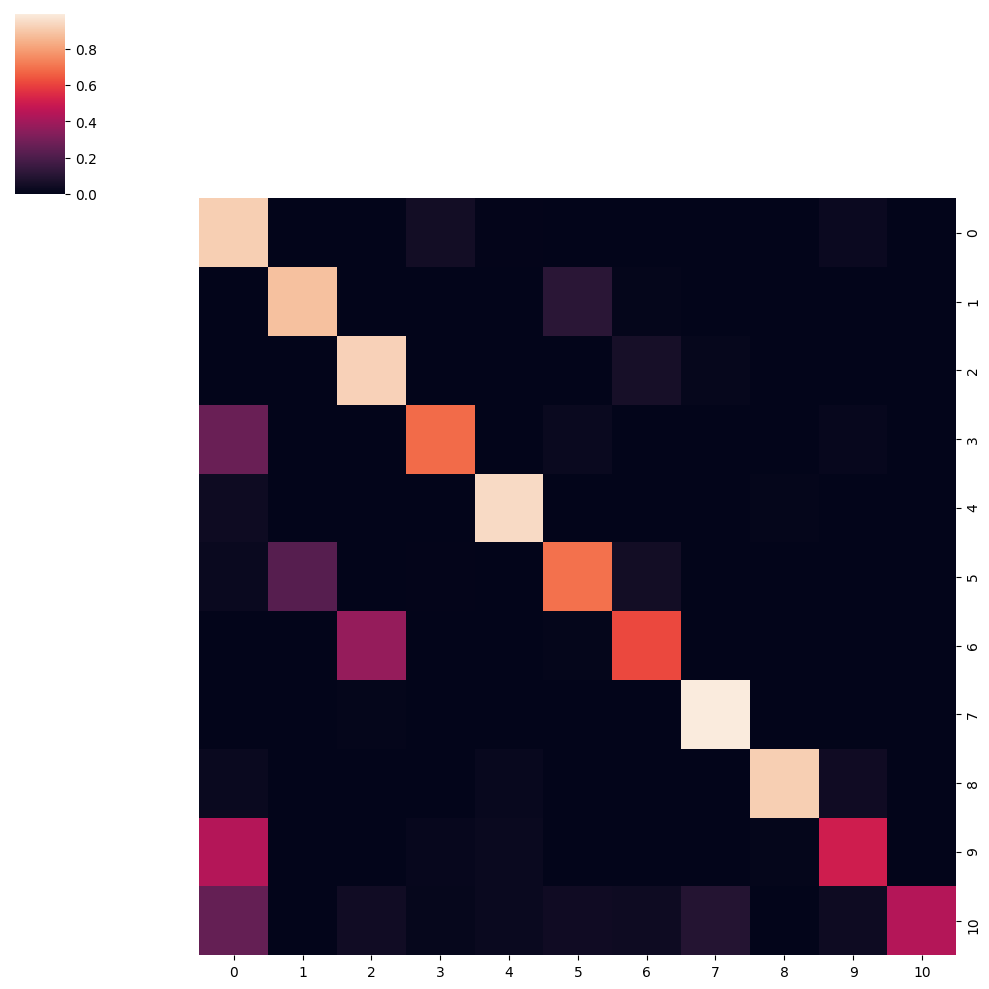

In [27]:
# Plot cluster map

cg = cg = sns.clustermap(
    cdx_map.values,
    row_cluster=False,
    col_cluster=False,
)

For clustering, concordex closer to 1 is better

In [28]:
# Compute concordex metrics
concordex, concordex_random_estimate, concordex_ratio = concordex_stat(pca, assignments)

print(f"""
Concordex:       {concordex:.2f}
Concordex Ratio: {concordex_ratio:.2f}
""")


Concordex:       0.77
Concordex Ratio: 8.71

